# APRENDIZAJE SUPERVISADO

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
DataO=pd.read_csv('../Datos/ObesityDataSet_raw_and_data_sinthetic.csv')
DataO

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Nueva base con Eliminación de valores atipicos y de variables de peso y altura

In [37]:
import pandas as pd

columnas_numericas = DataO.select_dtypes(include=['number'])

for columna in columnas_numericas.columns:
    
    q1 = columnas_numericas[columna].quantile(0.25)
    q3 = columnas_numericas[columna].quantile(0.75)
    iqr = q3 - q1
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr
    

    Data_new1 = DataO[(DataO[columna] >= limite_inferior) & (DataO[columna] <= limite_superior)]

D=Data_new1.iloc[:,[0,1,4,5,6,7,8,9,10,11,12,13,14,15,16]]
D

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder,MinMaxScaler,StandardScaler
import numpy as np


In [39]:
X_cuanti= D.iloc[:,[1,4,5,8,10,11]] ;X_cuanti

,Age,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...
2106,20.976842,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,3.0,3.0,2.852339,1.139107,0.586035


In [40]:
X_cuali=D.iloc[:,[0,2,3,6,7,9,12,13]]; X_cuali
X_cate_ordinal=D.iloc[:, [6,12]]
X_cate_ordinal


,CAEC,CALC
0,Sometimes,no
1,Sometimes,Sometimes
2,Sometimes,Frequently
3,Sometimes,Frequently
4,Sometimes,Sometimes
...,...,...
2106,Sometimes,Sometimes
2107,Sometimes,Sometimes
2108,Sometimes,Sometimes
2109,Sometimes,Sometimes


In [41]:
X_cate_nominal=D.iloc[:, [0,2,3,7,9,13]];X_cate_nominal

,Gender,family_history_with_overweight,FAVC,SMOKE,SCC,MTRANS
0,Female,yes,no,no,no,Public_Transportation
1,Female,yes,no,yes,yes,Public_Transportation
2,Male,yes,no,no,no,Public_Transportation
3,Male,no,no,no,no,Walking
4,Male,no,no,no,no,Public_Transportation
...,...,...,...,...,...,...
2106,Female,yes,yes,no,no,Public_Transportation
2107,Female,yes,yes,no,no,Public_Transportation
2108,Female,yes,yes,no,no,Public_Transportation
2109,Female,yes,yes,no,no,Public_Transportation


In [42]:
X=pd.concat([X_cuanti,X_cate_nominal,X_cate_ordinal],axis=1)
X

,Age,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,SMOKE,SCC,MTRANS,CAEC,CALC
0,21.000000,2.0,3.0,2.000000,0.000000,1.000000,Female,yes,no,no,no,Public_Transportation,Sometimes,no
1,21.000000,3.0,3.0,3.000000,3.000000,0.000000,Female,yes,no,yes,yes,Public_Transportation,Sometimes,Sometimes
2,23.000000,2.0,3.0,2.000000,2.000000,1.000000,Male,yes,no,no,no,Public_Transportation,Sometimes,Frequently
3,27.000000,3.0,3.0,2.000000,2.000000,0.000000,Male,no,no,no,no,Walking,Sometimes,Frequently
4,22.000000,2.0,1.0,2.000000,0.000000,0.000000,Male,no,no,no,no,Public_Transportation,Sometimes,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,3.0,3.0,1.728139,1.676269,0.906247,Female,yes,yes,no,no,Public_Transportation,Sometimes,Sometimes
2107,21.982942,3.0,3.0,2.005130,1.341390,0.599270,Female,yes,yes,no,no,Public_Transportation,Sometimes,Sometimes
2108,22.524036,3.0,3.0,2.054193,1.414209,0.646288,Female,yes,yes,no,no,Public_Transportation,Sometimes,Sometimes
2109,24.361936,3.0,3.0,2.852339,1.139107,0.586035,Female,yes,yes,no,no,Public_Transportation,Sometimes,Sometimes


In [43]:
D_cate_nominal_names=["Gender","family_history_with_overweight","FAVC","SMOKE","SCC","MTRANS"]
D_cate_ordinal_names=["CAEC","CALC"]
D_conti_scalar_names=["Age","FCVC","NCP","CH2O","FAF","TUE"]


In [44]:
y=pd.DataFrame(D.iloc[:,14])
y

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
categorica_ordinal=OrdinalEncoder()
categorica_Onehot=OneHotEncoder()
númerica_standar=StandardScaler()
númerica_minmax=MinMaxScaler()

preprocessing = ColumnTransformer(
    [
        ("Codificación Ordinal", categorica_ordinal, D_cate_ordinal_names),
        ("Codificación Nominal", categorica_Onehot, D_cate_nominal_names),

        ("Transformación numérica Standar", númerica_standar, D_conti_scalar_names),
        
    ],
    verbose_feature_names_out=False,
)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [48]:
Random_forest = RandomForestClassifier(random_state=42)
Logistica=LogisticRegression()
NBayes=GaussianNB()
Arbol=DecisionTreeClassifier()

modelos=[Logistica,NBayes,Arbol,Random_forest]

In [49]:
from sklearn.metrics import classification_report

for modelo in modelos:

    flujo = Pipeline(
        [
           ("Preprocesamiento", preprocessing),
           ("Clasificador", modelo),
        
        ]
    )

    flujo.fit(X_train,y_train)

    y_pred=flujo.predict(X_test)

    print(classification_report(y_test,y_pred))


c:\Users\LINA C\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LINA C\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\LINA C\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passe

                     precision    recall  f1-score   support

Insufficient_Weight       0.55      0.64      0.60        56
      Normal_Weight       0.46      0.27      0.34        62
     Obesity_Type_I       0.57      0.64      0.61        78
    Obesity_Type_II       0.58      0.84      0.69        58
   Obesity_Type_III       0.91      1.00      0.95        63
 Overweight_Level_I       0.55      0.46      0.50        56
Overweight_Level_II       0.45      0.30      0.36        50

           accuracy                           0.61       423
          macro avg       0.58      0.60      0.58       423
       weighted avg       0.59      0.61      0.59       423

                     precision    recall  f1-score   support

Insufficient_Weight       0.27      0.77      0.40        56
      Normal_Weight       0.50      0.03      0.06        62
     Obesity_Type_I       0.55      0.23      0.32        78
    Obesity_Type_II       0.38      0.97      0.54        58
   Obesity_Type_III 

c:\Users\LINA C\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.95      0.92        56
      Normal_Weight       0.69      0.68      0.68        62
     Obesity_Type_I       0.86      0.85      0.85        78
    Obesity_Type_II       0.81      0.93      0.86        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.78      0.70      0.74        56
Overweight_Level_II       0.76      0.70      0.73        50

           accuracy                           0.83       423
          macro avg       0.83      0.83      0.83       423
       weighted avg       0.83      0.83      0.83       423



In [50]:
flujo.fit(X_train, y_train)

c:\Users\LINA C\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Codificación Ordinal',
                                                  OrdinalEncoder(),
                                                  ['CAEC', 'CALC']),
                                                 ('Codificación Nominal',
                                                  OneHotEncoder(),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('Transformación numérica '
                                                  'Standar',
                                                  StandardScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE'])],
                                   verbose_feature_names_out=False)),
                ('Clasificador', RandomForestClassifier(random_state=42))])

In [67]:
print(f"RF train accuracy: {flujo.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {flujo.score(X_test, y_test):.3f}")

RF train accuracy: 1.000
RF test accuracy: 0.832


In [51]:
import pandas as pd

feature_names = flujo[0:1].get_feature_names_out()

mdi_importances = pd.Series(
    flujo[-1].feature_importances_, index=feature_names
).sort_values(ascending=True)

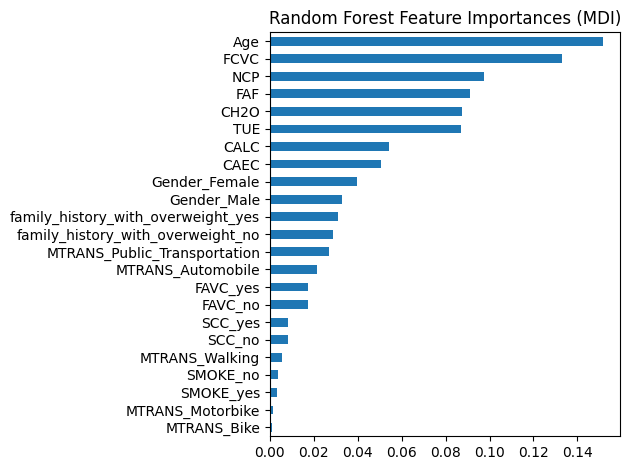

In [52]:
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

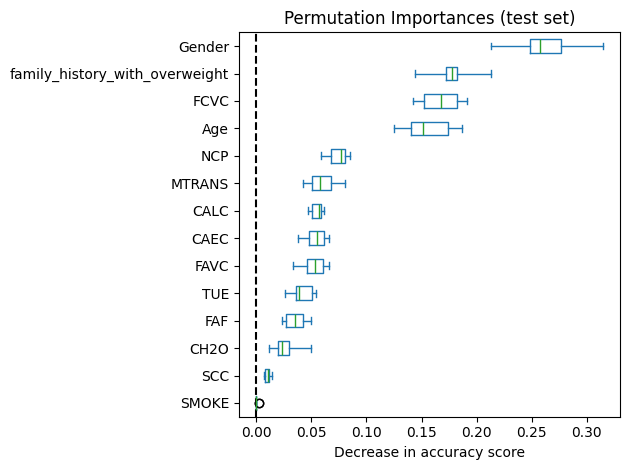

In [53]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    flujo, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

model = Random_forest


param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 5, 10, 20],
              'min_samples_split': [2, 5, 10]}


grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search

grid_search.fit(X_train, y_train)

#grid_search.score(X_test, y_test)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

## Conclusiones

El mejor modelo es RandomForest y las variables de mayor impacto son la edad (que en el cuaderno de exploración se relacionaba con la primera componete), la frecuencia de consumo de verduras (la cual se relaciono con la sgunda compomente principales) junto con la activida fisica y el consumo de comidas principales.